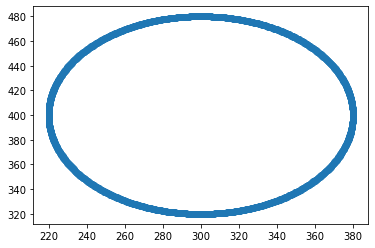

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import cv2


from render import Renderer
# Renderer is a class(package) which helps to plot in cv2
class object(Renderer):
    def __init__(self,recordLocation = None):
        super().__init__(recordLocation=recordLocation)
        self.its = 0
        self.xo = 300 
        self.yo = 400 # xo,yo is coordinate of center of circle
        self.rad = 80 # radius of the circle
        self.points = []
    def getInfo(self):
        info = {
            'x': round(self.x,4),
            'y': round(self.y,4),
        }
        return info
    def plot(self):
        data = np.array(list(self.points))
        plt.scatter(data[:,0],data[:,1])
        plt.show()
        return data
        
    def step(self,d0):
        self.x = self.xo + self.rad*np.cos(d0*math.pi/180)
        self.y = self.yo + self.rad*np.sin(d0*math.pi/180)
        self.its+=1
        if self.its %2.5 == 0:
            self.points.append((self.x,self.y))
    def draw(self,image):
        cv2.circle(image,(int(self.x),int(self.y)),6,(0,255,0),-1)  # red pointer
        for x,y in self.points:
            cv2.circle(image,(int(x),int(y)),1,(0,0,255),-1) # draw the circle
        return image

anim = object(recordLocation ='anim.mp4')
for i in range(0,5000):
    anim.step((360*i)/5000)
    if i%5==0:
        anim.render(height=600,pause=1)

        
# Exporting the points of the circle in the excel sheet
import pandas as pd

df = pd.DataFrame(anim.plot(), columns = ['X','Y']) 

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('circle1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='Sheet1', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()
        
        
        
        

